## Final Project: Health by Country in Python
### SDS 348
### Cloie Angel Campos - ctc2453

In [8]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Import dataset
hbc = pd.read_csv("healthbycountry.csv")

**There were two data sets merged in this project, and both were taken from the website kaggle. The first data set, "Country Statistics -UNData", contains 70 variables falling into the four major categories of general information, economic indicators, social indicators, and environmental & infrastructure indicators. This cleaned up data set was taken from UNData website. At its original source, the data is collected from several international statistical sources such as the Statistics Division and the Population Division of the United Nations, the statistical services of the United Nations, specialized agencies, etc. For the purpose of this data analysis, only three variables will be taken: country, region, and total expenditure on health in % of GDP. The second dataset, "country health indicators", is a previously tidied dataset organized by country. It contains data regarding Covid-19 cases and deaths, causes of death, food sources, vaccination rates, and general information about the country. For the purpose of this experiment, the causes of death variables organized by disease will be taken from the dataset.**

**The new dataset now has only 163 observations after only keeping complete cases from the 229 in "Country Statistics -UNData" and the 180 in "country health indicators".**

**The percent DALY, “disability-adjusted life years” variable serves as a measure of the burden of a disease in terms of how many years were spent living with the disease and the years lost due to premature death. The percent dictates the length of "healthy" life lost in comparison to what would be expected if the person did not have that disease, averaged for each country.** 

**As a biology major with interest in becoming a doctor, I'm interested in seeing the distribution of disease across the world and how this may be influenced by region and expenditure on health.**

In [19]:
# mean 
(hbc.query('health_expenditure > 0') \
 .filter(['health_expenditure']) \
 .agg(['mean']))

,health_expenditure
mean,6.738509


*Each country spends an average of 6.74% of their GDP on health. The data had to be filtered to only include health expenditures greater than 0% because some countries contain values of "-99%", which indicates that there is no data on health expenditure % for that country.*

Text(0.5,1,'Health Expenditure')

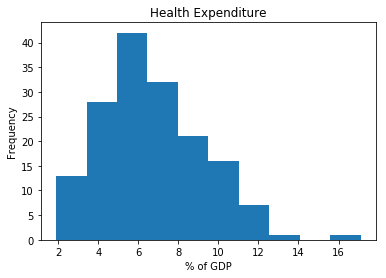

In [27]:
# Create a histogram of health expenditure
health_exp_fixed = hbc.query('health_expenditure > 0') \
 .filter(['health_expenditure'])
health_exp_fixed
# Create a histogram
health_exp_fixed['health_expenditure'].plot(kind = "hist")
plt.xlabel('% of GDP') # add a label
plt.title('Health Expenditure') # add title

*The mean amount of health expenditure, 6.74%, is slightly higher than what appears to be the median, which is at about 6%. This is likely due to the data being right skewed, especially by the country spending about 16% of their GDP on health. The data is unimodal.*

In [28]:
# counts for region
hbc['Region'].value_counts()

WesternAsia          16
EasternAfrica        15
WesternAfrica        14
SouthernEurope       13
Caribbean            12
SouthAmerica         12
EasternEurope        10
NorthernEurope       10
South-easternAsia     9
SouthernAsia          9
CentralAmerica        8
WesternEurope         7
MiddleAfrica          6
NorthernAfrica        6
EasternAsia           4
SouthernAfrica        3
CentralAsia           3
Melanesia             2
Oceania               2
NorthernAmerica       2
Name: Region, dtype: int64

From the counts, Western Asia has the highest number of complete cases on health expenditure and top causes of death by disease. Regions like Melanesia, Oceania, and North America contain as little as only 2 complete cases.

Text(0.5,1,'Complete Cases by Region of the World')

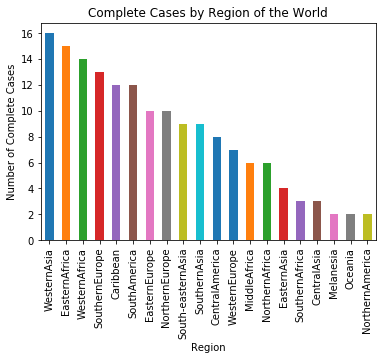

In [31]:
# create a barplot by displaying counts
hbc['Region'].value_counts().plot(kind = "bar")
plt.xlabel('Region') # add x label
plt.ylabel('Number of Complete Cases') # add y label
plt.title('Complete Cases by Region of the World') # add title

*As there was a very wide variety of complete cases by region, data analysis based on this categorical variable would be difficult as it is unlikely there is equal variance across region. Thus, it may be better to analyze the data based on a different grouping, such as continent, Northern/Southern Hemisphere, or Eastern/Western Hemisphere.*

References:
"Country Statistics - UNData" source: https://www.kaggle.com/sudalairajkumar/undata-country-profiles

"country health indicators" source: https://www.kaggle.com/nxpnsv/country-health-indicators